In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor

from sklearn.metrics import r2_score

In [3]:
# DataSet: https://www.kaggle.com/datasets/shivam2503/diamonds
data = pd.read_csv("D:\DataSets\Predictive Analysis_ML\diamonds dataset.csv")

# Data Understanding

In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
data.shape

(53940, 11)

In [6]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2710,2711,0.31,Ideal,G,SI1,61.6,55.0,563,4.34,4.37,2.68
18059,18060,0.36,Premium,F,SI1,61.1,60.0,616,4.62,4.57,2.81
41903,41904,0.52,Very Good,F,SI1,61.3,56.0,1261,5.20,5.24,3.20
10921,10922,1.20,Very Good,J,SI1,61.3,59.0,4891,6.83,6.90,4.21
50753,50754,0.60,Ideal,F,VVS2,61.8,57.0,2298,5.36,5.42,3.33


In [7]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 53940 entries, 0 to 53939

Data columns (total 11 columns):

 #   Column      Non-Null Count  Dtype  

---  ------      --------------  -----  

 0   Unnamed: 0  53940 non-null  int64  

 1   carat       53940 non-null  float64

 2   cut         53940 non-null  object 

 3   color       53940 non-null  object 

 4   clarity     53940 non-null  object 

 5   depth       53940 non-null  float64

 6   table       53940 non-null  float64

 7   price       53940 non-null  int64  

 8   x           53940 non-null  float64

 9   y           53940 non-null  float64

 10  z           53940 non-null  float64

dtypes: float64(6), int64(2), object(3)

memory usage: 4.5+ MB


In [9]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [10]:
data.duplicated().sum()

0

# Data Cleaning

In [12]:
data.drop(columns="Unnamed: 0", inplace=True)

In [75]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
data["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [15]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [16]:
data["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [17]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [18]:
data["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [19]:
data["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [76]:
# x, y, z cant be zero
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [79]:
data.shape

(53920, 10)

# Exploratory Data Analysis

In [20]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 53940 entries, 0 to 53939

Data columns (total 10 columns):

 #   Column   Non-Null Count  Dtype  

---  ------   --------------  -----  

 0   carat    53940 non-null  float64

 1   cut      53940 non-null  object 

 2   color    53940 non-null  object 

 3   clarity  53940 non-null  object 

 4   depth    53940 non-null  float64

 5   table    53940 non-null  float64

 6   price    53940 non-null  int64  

 7   x        53940 non-null  float64

 8   y        53940 non-null  float64

 9   z        53940 non-null  float64

dtypes: float64(6), int64(1), object(3)

memory usage: 4.1+ MB


Univariant Analysis

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


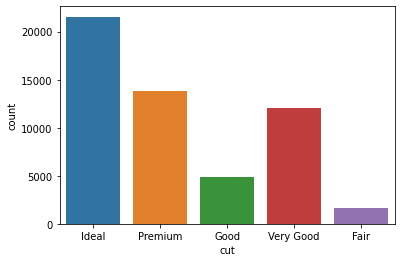

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


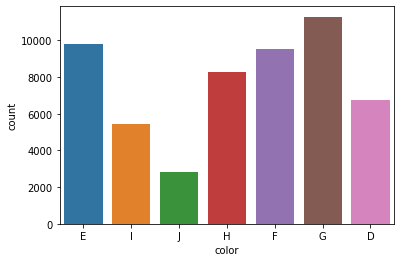

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


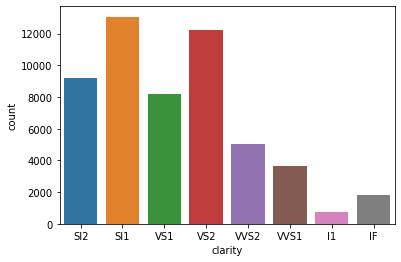

In [26]:
# Bar Plot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        plt.show(sns.countplot(data[data.columns[i]]))
        #plt.xlabel(data.columns[i])

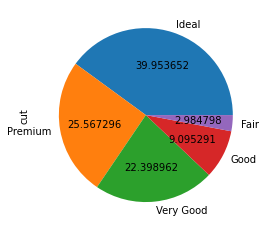

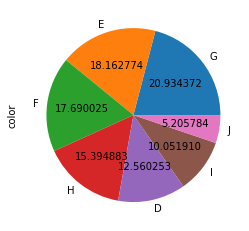

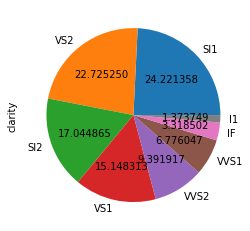

In [25]:
# Pie Chart
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "object":
        plt.show(data[data.columns[i]].value_counts().plot(kind="pie", autopct="%2f"))

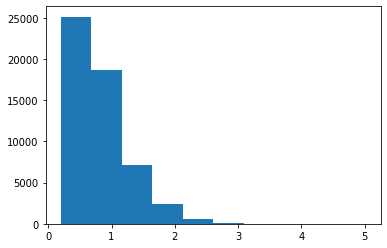

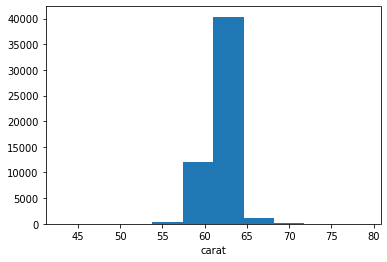

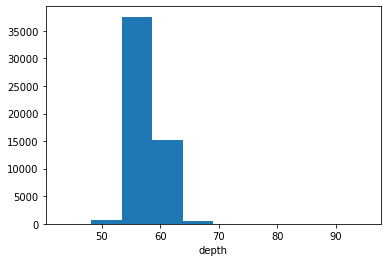

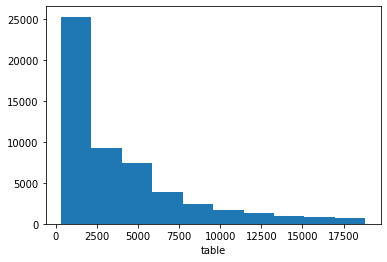

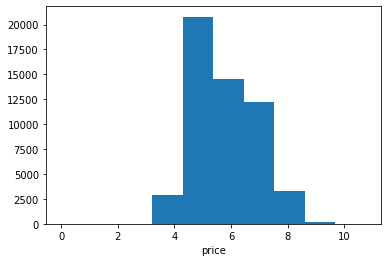

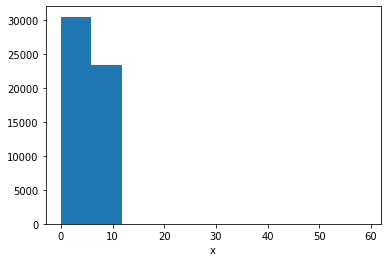

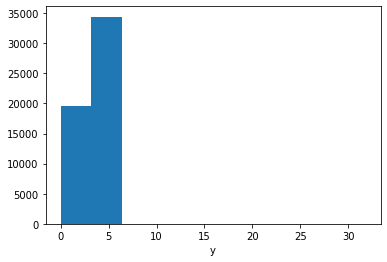

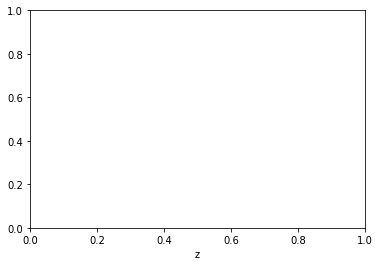

In [27]:
# Histogram
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(plt.hist(data[data.columns[i]]))
        plt.xlabel(data.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


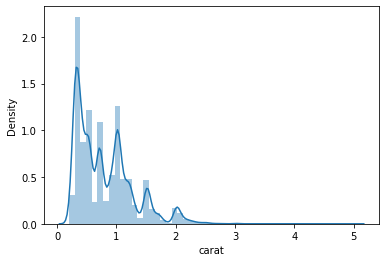

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


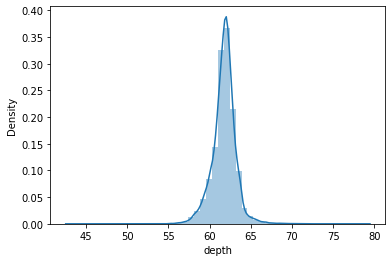

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


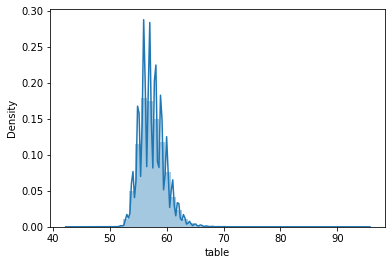

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


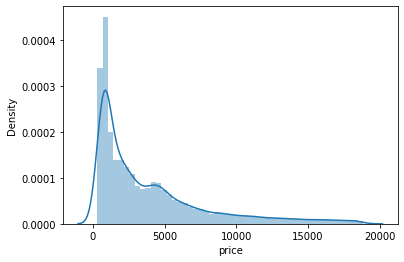

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


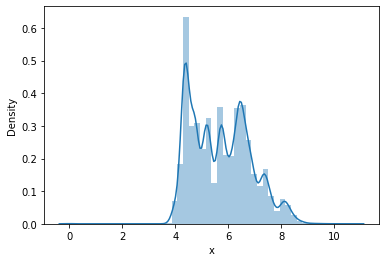

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


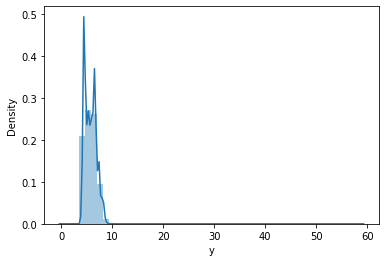

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


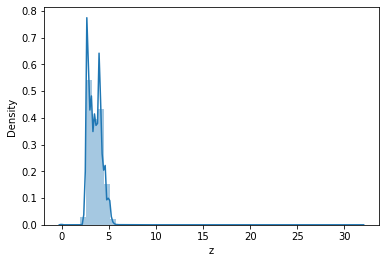

In [28]:
# Distplot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.distplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


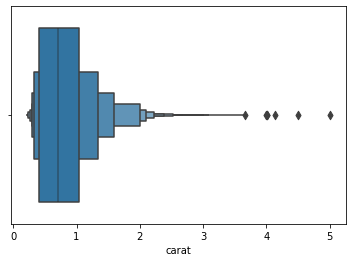

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


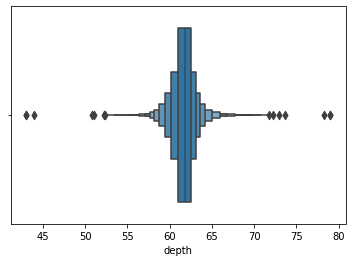

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


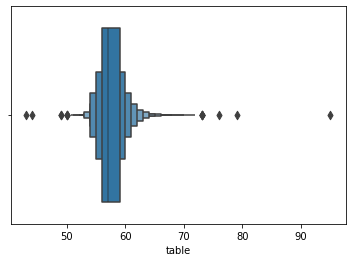

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


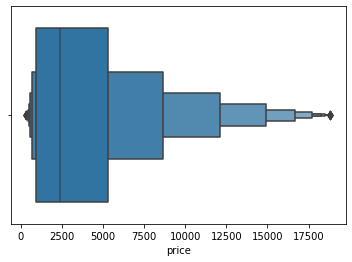

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


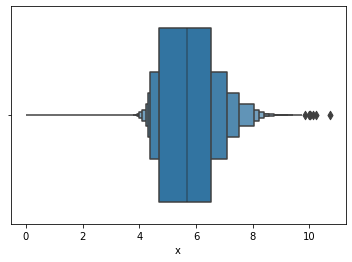

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


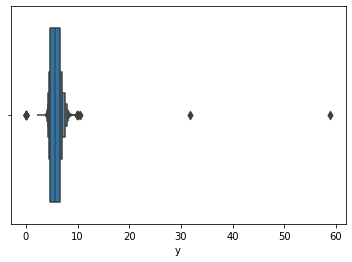

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


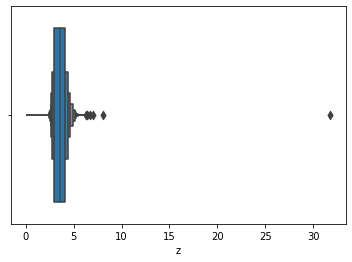

In [29]:
# BoxPlot
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxenplot(data[data.columns[i]]))
        #plt.xlabel(train.columns[i])

Bivariant Analysis

In [30]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Numeriacl - Numerical

1. ScatterPlot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='depth'>

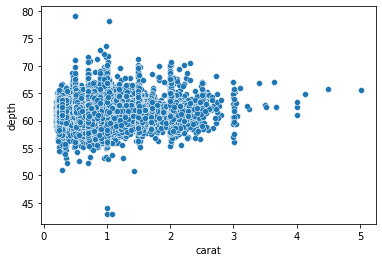

In [35]:
sns.scatterplot(data["carat"], data["depth"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='table'>

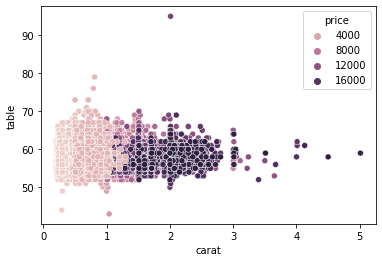

In [36]:
sns.scatterplot(data["carat"], data["table"], hue=data["price"])

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


<AxesSubplot:xlabel='depth', ylabel='table'>

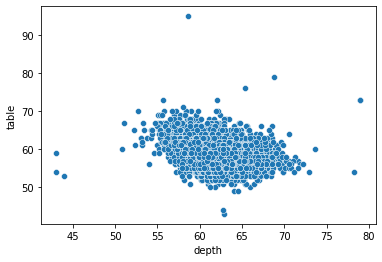

In [38]:
sns.scatterplot(data["depth"], data["table"])

Numericaal - Categorical 

In [39]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


1. Bar PLot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


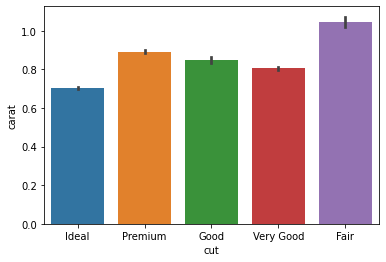

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


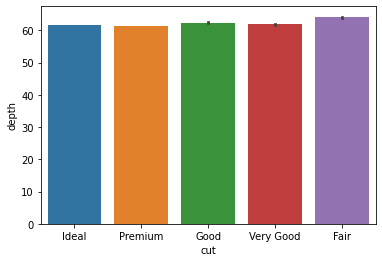

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


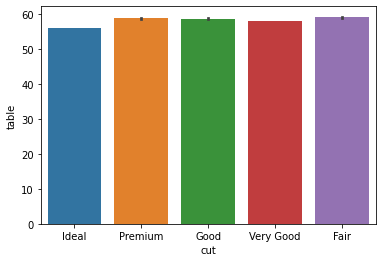

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


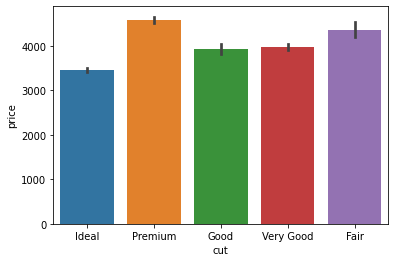

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


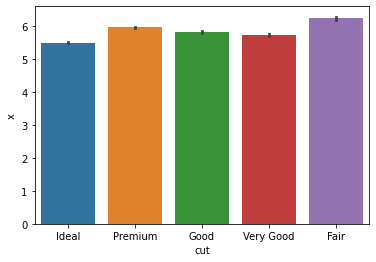

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


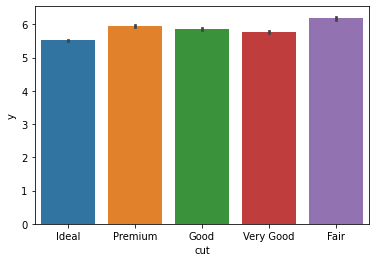

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


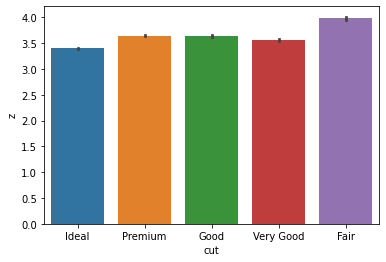

In [44]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["cut"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


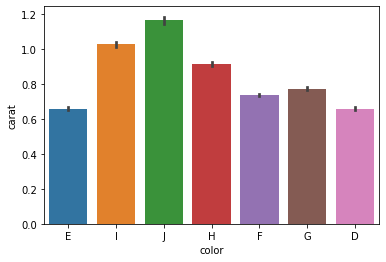

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


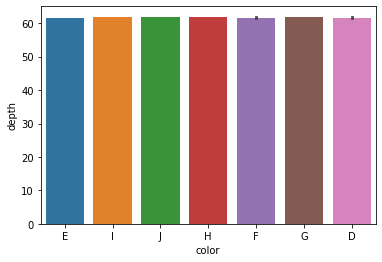

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


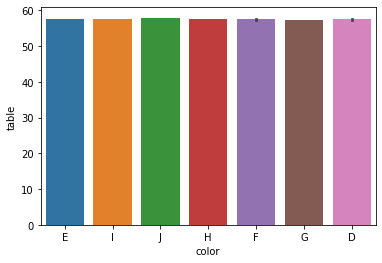

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


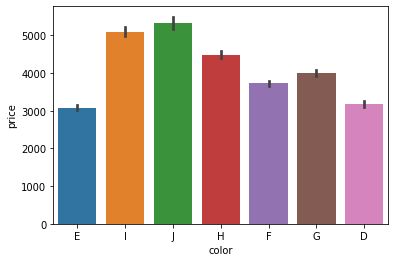

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


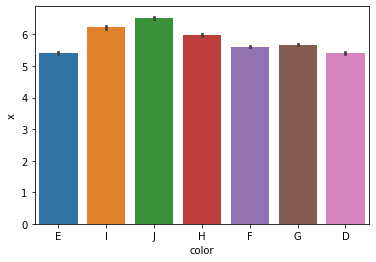

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


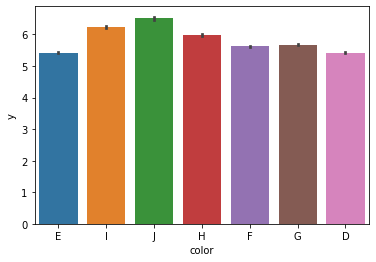

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


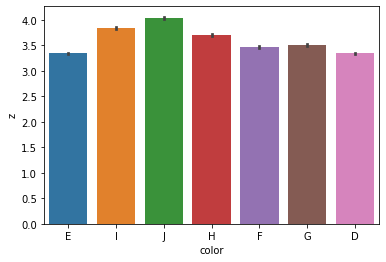

In [45]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["color"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


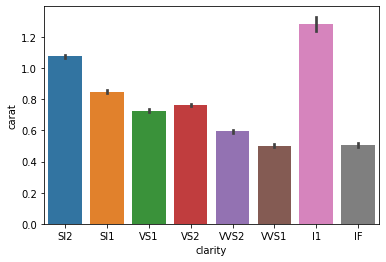

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


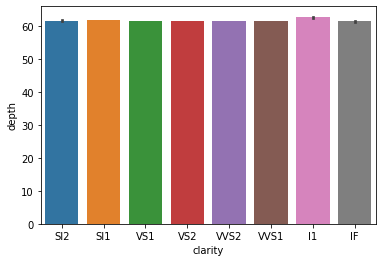

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


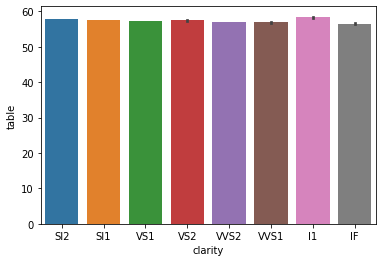

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


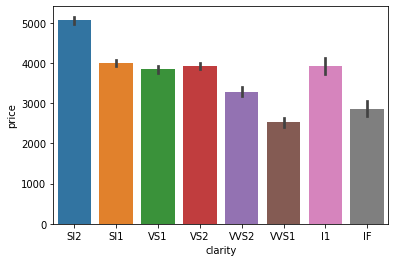

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


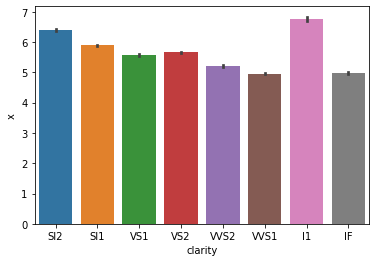

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


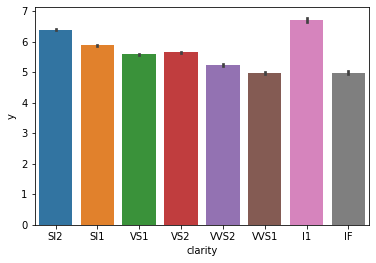

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


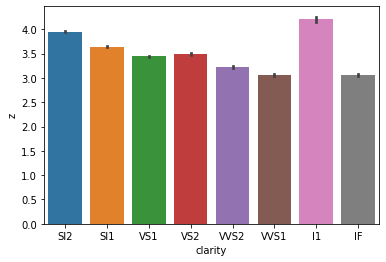

In [46]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.barplot(data["clarity"], data[data.columns[i]]))

2. Box Plot

In [48]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


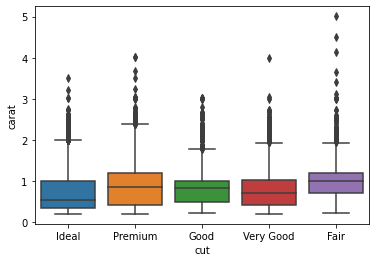

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


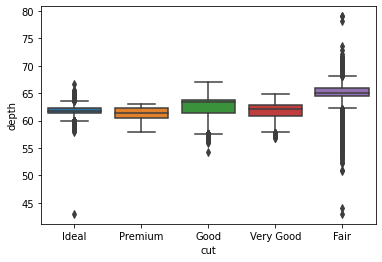

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


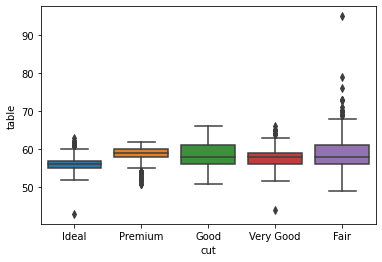

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


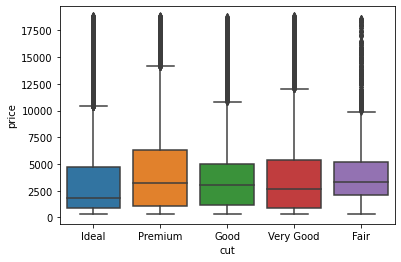

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


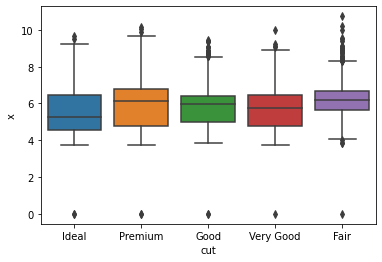

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


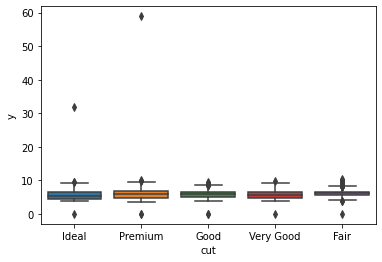

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


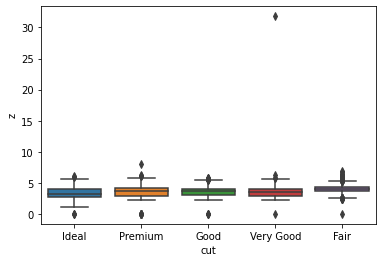

In [49]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["cut"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


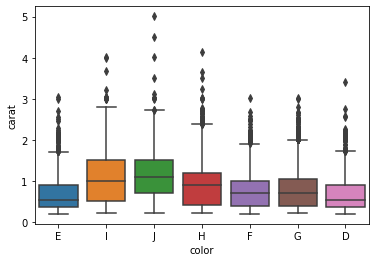

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


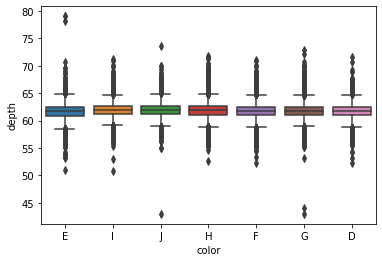

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


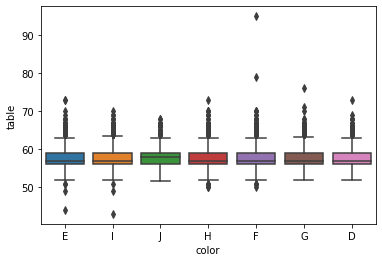

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


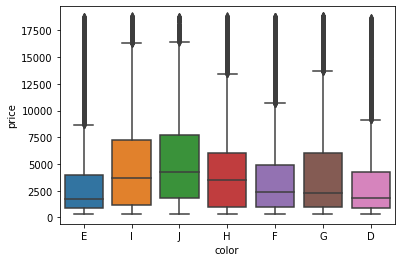

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


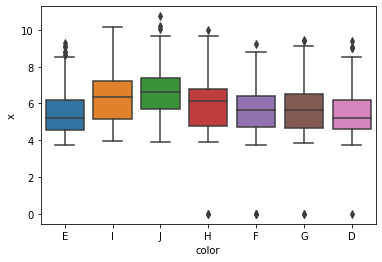

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


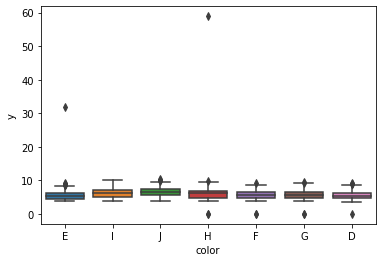

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


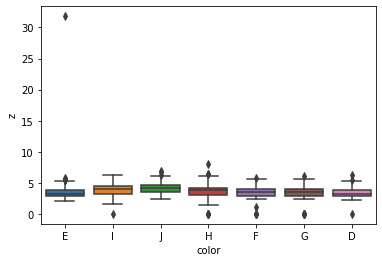

In [50]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["color"], data[data.columns[i]]))

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


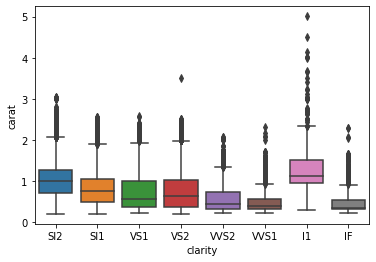

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


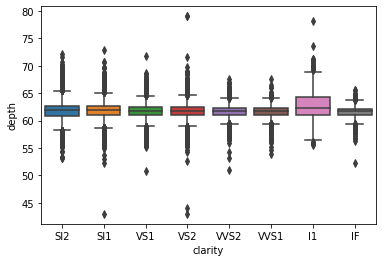

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


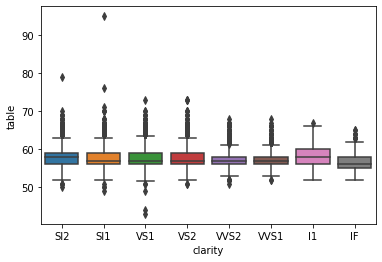

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


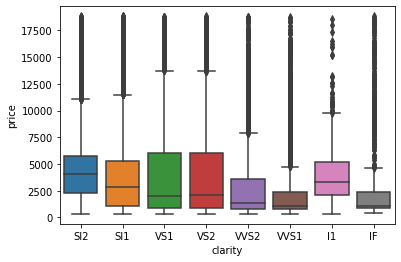

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


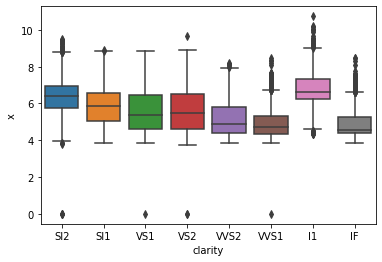

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


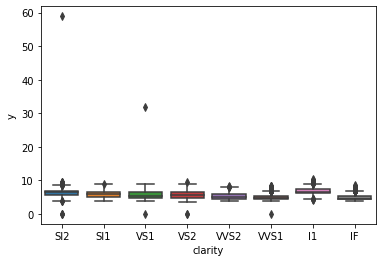

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


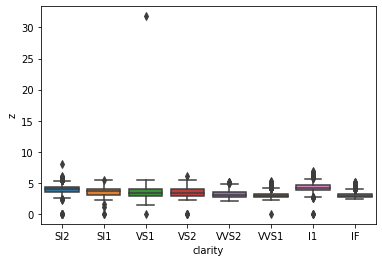

In [51]:
for i in range(len(list(data.columns))):
    if data[data.columns[i]].dtypes == "int64" or data[data.columns[i]].dtypes == "float64":
        plt.show(sns.boxplot(data["clarity"], data[data.columns[i]]))

3. Dist Plot

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)

C:\Users\mohit\anaconda3\envs\ML_DL\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

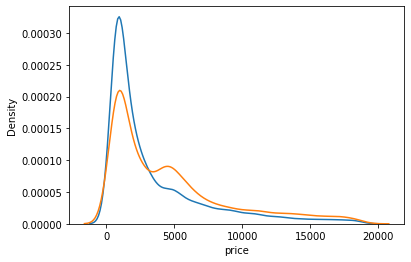

In [54]:
sns.distplot(data[data["cut"]=="Ideal"]["price"], hist = False)
sns.distplot(data[data["cut"]=="Premium"]["price"], hist = False)
# sns.distplot(data[data["cut"]=="Good"]["price"], hist = False)
# sns.distplot(data[data["cut"]=="Very Good"]["price"], hist = False)
# sns.distplot(data[data["cut"]=="Fair"]["price"], hist = False)

Categorical - Categorical

In [55]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


1. HeatMap

<AxesSubplot:xlabel='color', ylabel='cut'>

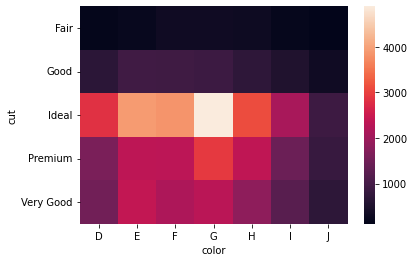

In [56]:
sns.heatmap(pd.crosstab(data["cut"], data["color"]))

<AxesSubplot:xlabel='clarity', ylabel='cut'>

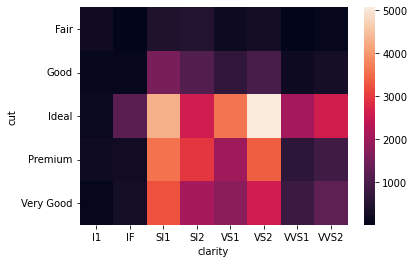

In [57]:
sns.heatmap(pd.crosstab(data["cut"], data["clarity"]))

<AxesSubplot:xlabel='clarity', ylabel='color'>

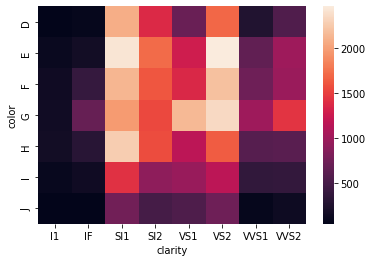

In [58]:
sns.heatmap(pd.crosstab(data["color"], data["clarity"]))

2. ClusterMap

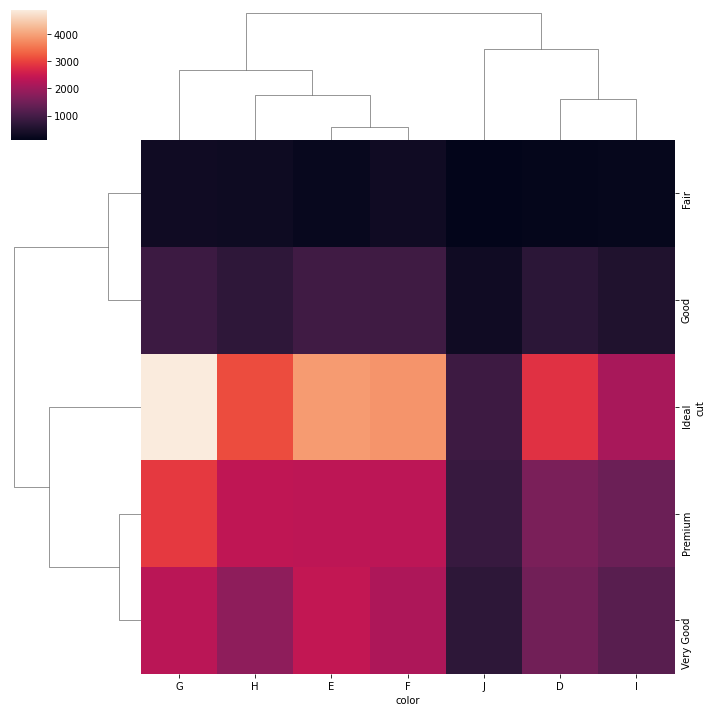

In [61]:
sns.clustermap(pd.crosstab(data["cut"], data["color"]))

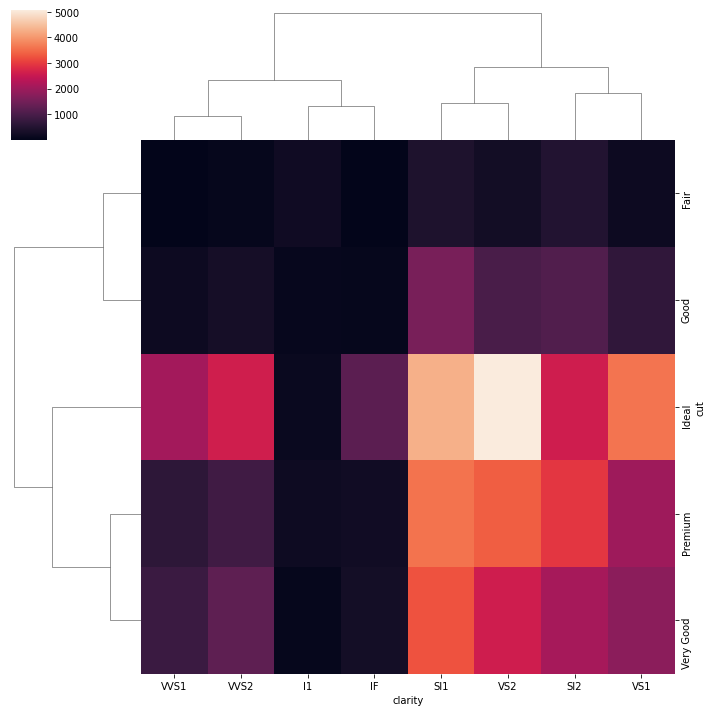

In [60]:
sns.clustermap(pd.crosstab(data["cut"], data["clarity"]))

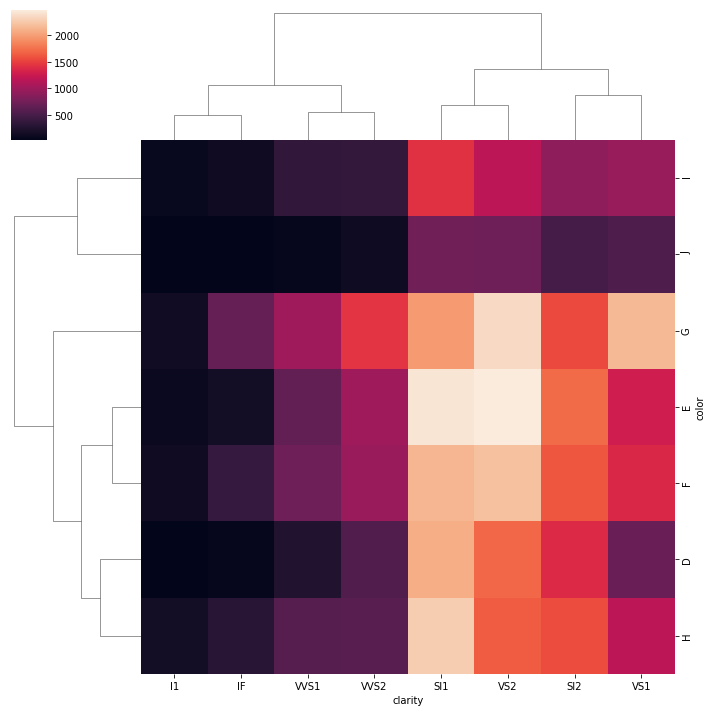

In [59]:
sns.clustermap(pd.crosstab(data["color"], data["clarity"]))

Multivariant Analysis

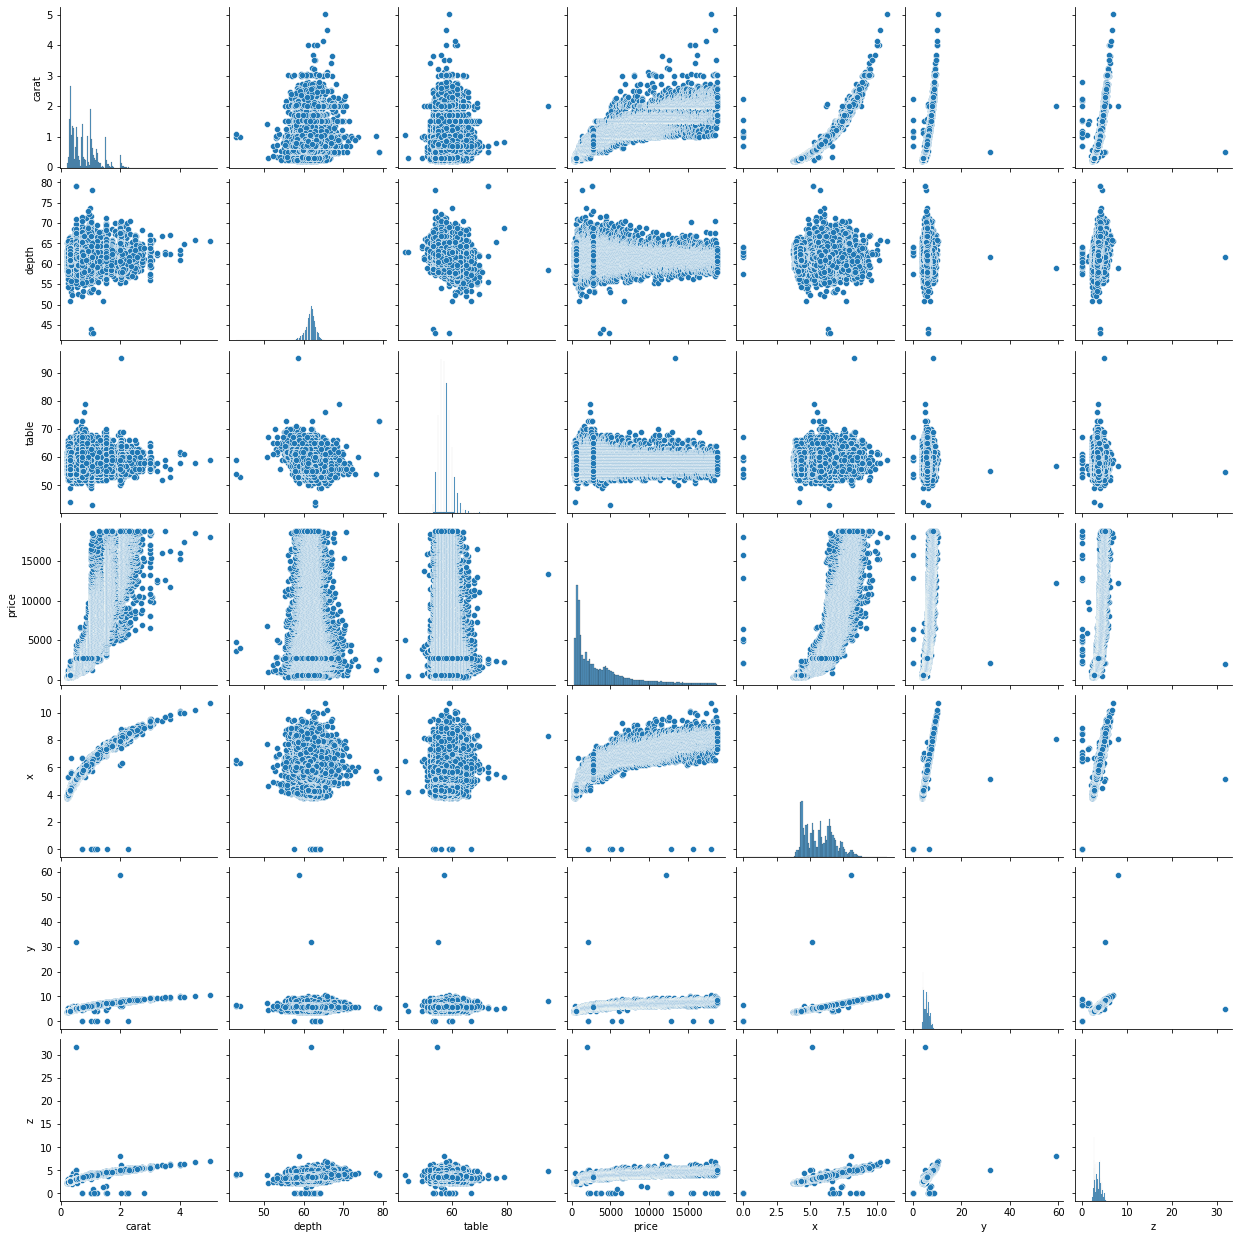

In [62]:
#sns.pairplot(train, hue ="species")
sns.pairplot(data)

In [63]:
data.shape

(53940, 10)

# Feature Transformation

1. Outlier Detection

In [64]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


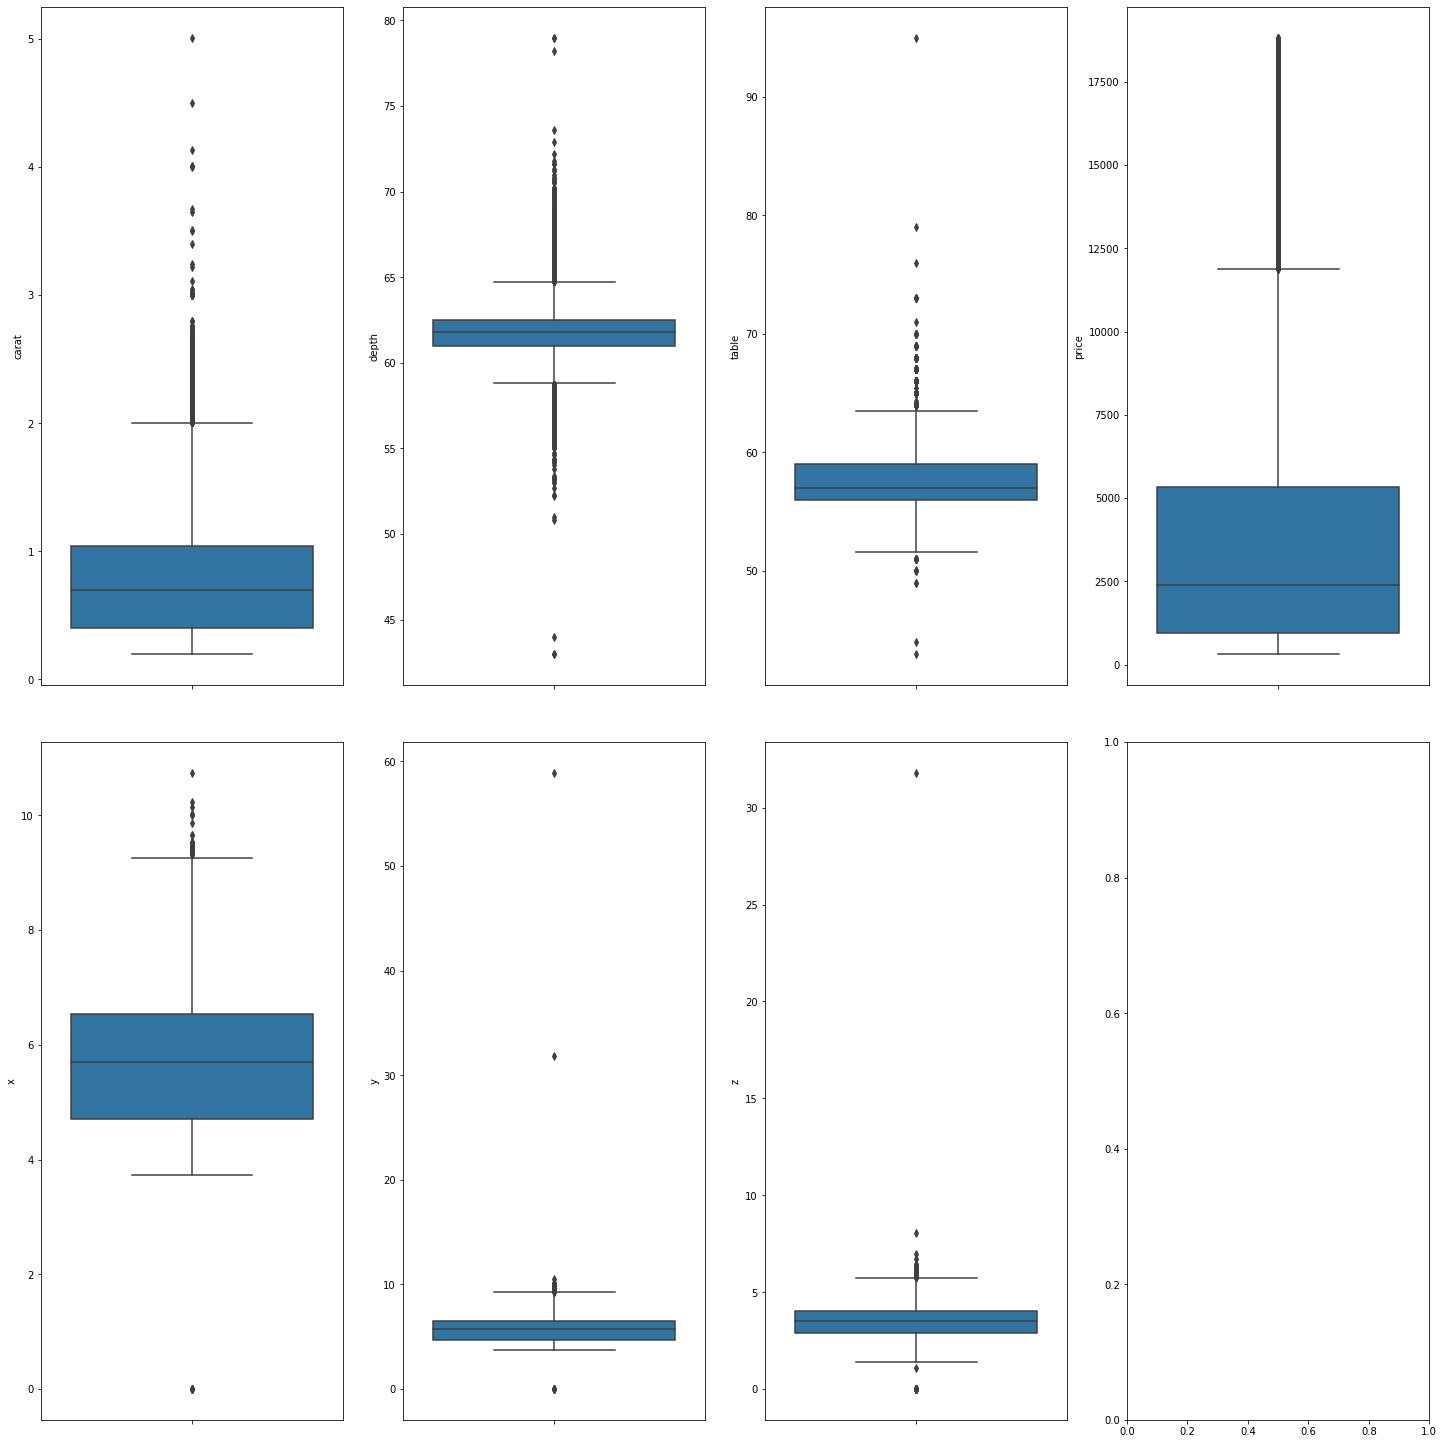

In [70]:
data1 = data.drop(columns=['cut',"color","clarity"], axis=1)

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

2. Handling Categorical Features 

3. Feature Scaling - Normalization

In [71]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [73]:
x = data.drop(columns="price")
y = data["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [74]:
x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
34837,0.30,Premium,G,VVS2,60.8,58.0,4.38,4.34,2.65
19858,1.06,Very Good,G,IF,61.2,57.0,6.52,6.56,4.00
9544,1.00,Good,D,SI2,63.3,56.0,6.35,6.38,4.03
44752,0.51,Premium,D,SI1,62.2,58.0,5.13,5.06,3.17
45717,0.56,Ideal,E,SI1,60.9,56.0,5.35,5.32,3.25


In [81]:
transformer = ColumnTransformer(transformers=[
    ("tnf1", OneHotEncoder(drop="first", sparse=False), ["cut", "color", "clarity"]),
    ("tnf2", MinMaxScaler(), ["carat", "depth", "table", "x", "y", "z"])
], remainder="passthrough")

In [82]:
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

In [83]:
x_train

array([[0.        , 0.        , 1.        , ..., 0.40782123, 0.07368421,
        0.08333333],
       [0.        , 0.        , 0.        , ..., 0.60707635, 0.11137521,
        0.12578616],
       [1.        , 0.        , 0.        , ..., 0.59124767, 0.10831919,
        0.12672956],
       ...,
       [0.        , 0.        , 0.        , ..., 0.57914339, 0.10611205,
        0.12044025],
       [0.        , 0.        , 0.        , ..., 0.44599628, 0.08098472,
        0.09496855],
       [0.        , 0.        , 0.        , ..., 0.37430168, 0.06842105,
        0.07861635]])

In [84]:
x_train.shape

(43152, 23)

# Model Building

**Linear Regression**

In [86]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)*100

92.05954751655327

In [87]:
score = []
for i in range(5000):
    x = data.drop(columns="price")
    y = data["price"]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  2586

92.84200266105206


In [89]:
lr = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2586)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

model1 = lr.fit(x_train,y_train)
pred = model1.predict(x_test)
r2_score(y_test, pred)*100

92.84200266105206

**Decision Tree Regressor**

In [90]:
dtr = DecisionTreeRegressor()
model = dtr.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)*100

95.41922122164428

In [91]:
score = []
for i in range(100):
    x = data.drop(columns="price")
    y = data["price"]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  73

96.38543050178485


In [92]:
dtr = DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=73)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

model2 = dtr.fit(x_train,y_train)
pred = model2.predict(x_test)
r2_score(y_test, pred)*100

96.33289187438679

**Random Forest Regressor**

In [93]:
rfr = RandomForestRegressor()
model = rfr.fit(x_train,y_train)
pred = model.predict(x_test)
r2_score(y_test, pred)*100

97.79791415985827

In [94]:
score = []
for i in range(10):
    x = data.drop(columns="price")
    y = data["price"]


    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=i)
    
    x_train = transformer.fit_transform(x_train)
    x_test = transformer.transform(x_test)
    
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    score.append(r2_score(y_test,pred)*100)
print("i= ",np.argmax(score))
print(score[np.argmax(score)])

i=  4

97.77183250746518


In [96]:
rfr = RandomForestRegressor()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)
    
x_train = transformer.fit_transform(x_train)
x_test = transformer.transform(x_test)

model3 = rfr.fit(x_train,y_train)
pred = model3.predict(x_test)
r2_score(y_test, pred)*100

97.78233034264512

In [42]:
# data["carat"] = data[(data["carat"] < data["carat"].mean() + 3 * data["carat"].std()) & (data["carat"] > data["carat"].mean() - 3 * data["carat"].std())] 
# data["depth"] = data[(data["depth"] < data["depth"].mean() + 3 * data["depth"].std()) & (data["depth"] > data["depth"].mean() - 3 * data["depth"].std())] 
# data["table"] = data[(data["table"] < data["table"].mean() + 3 * data["table"].std()) & (data["table"] > data["table"].mean() - 3 * data["table"].std())] 
# #data["price"] = data[(data["price"] < data["price"].mean() + 3 * data["price"].std()) & (data["price"] > data["price"].mean() - 3 * data["price"].std())] 
# data["x"] = data[(data["x"] < data["x"].mean() + 3 * data["x"].std()) & (data["x"] > data["x"].mean() - 3 * data["x"].std())] 
# data["y"] = data[(data["y"] < data["y"].mean() + 3 * data["y"].std()) & (data["y"] > data["y"].mean() - 3 * data["y"].std())] 
# data["z"] = data[(data["z"] < data["z"].mean() + 3 * data["z"].std()) & (data["z"] > data["z"].mean() - 3 * data["z"].std())] 